<a href="https://colab.research.google.com/github/abiflynn/data_analysis_python/blob/main/data_analysis_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENIAC DATACLEANING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# brands.csv
url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=share_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path, sep =",")

# orders.csv
url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path, sep =",")

# orderlines.csv
url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path, sep =",")

# products.csv
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=share_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path, sep =",")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', 400)

b = brands.copy()
o = orders.copy()
ol = orderlines.copy()
p = products.copy()

# CLEANING BRANDS

In [2]:
b.long[b.short == "KEN"] = "Kensington"
b.long[b.short == "MUJ"] = "Mujjo"
b.long[b.short == "AP2"] = "Apple 2nd-hand"
b_cl = b
b_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


# CLEANING ORDERS

In [3]:
o.drop("created_date", axis=1, inplace=True)
o = o[o.state == "Completed"]
o_cl = o
o_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    46605 non-null  int64  
 1   total_paid  46605 non-null  float64
 2   state       46605 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ MB


# CLEANING ORDERLINES

In [4]:
ol.drop("product_id", axis = 1, inplace = True)
ol.drop("id", axis = 1, inplace = True)
ol.date = pd.to_datetime(ol.date)
ol.rename(columns={"id_order": "order_id"}, inplace=True)
ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          293983 non-null  int64         
 1   product_quantity  293983 non-null  int64         
 2   sku               293983 non-null  object        
 3   unit_price        293983 non-null  object        
 4   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


In [5]:
ol["unit_price_cl"] = (
    np.where((ol["unit_price"].str.contains("\d+\.\d+\.\d*")), (pd.to_numeric(ol["unit_price"].str.replace(".", ""))/100).round(2),
    ol["unit_price"])
)
ol["unit_price_cl"] = pd.to_numeric(ol["unit_price_cl"]).round(2)
ol.iloc[36979, 5] = (ol.iloc[36979, 5]/1000).round(2)
ol.drop("unit_price", axis=1, inplace=True)
ol["total_price"] = ol.unit_price_cl * ol.product_quantity
ol_cl = ol 
ol_cl.info()

<ipython-input-5-a4b2299b0811>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  np.where((ol["unit_price"].str.contains("\d+\.\d+\.\d*")), (pd.to_numeric(ol["unit_price"].str.replace(".", ""))/100).round(2),


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          293983 non-null  int64         
 1   product_quantity  293983 non-null  int64         
 2   sku               293983 non-null  object        
 3   date              293983 non-null  datetime64[ns]
 4   unit_price_cl     293983 non-null  float64       
 5   total_price       293983 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 13.5+ MB


# CLEANING PRODUCTS

In [6]:
p = p.drop_duplicates()
p.loc[p.desc.isna(), "desc"] = p.loc[p.desc.isna(), "name"]
p = p.dropna()
p_corrupt = p.loc[p.price.str.contains("\d+\.\d\d\d")].index
p.drop(p_corrupt, inplace = True)
p.price = pd.to_numeric(p.price)
p.drop("promo_price", axis = 1, inplace = True)
p["short"] = p["sku"].str[0:3]
p.drop("in_stock", axis = 1, inplace = True)
p_cl = p
p_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9946 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sku     9946 non-null   object 
 1   name    9946 non-null   object 
 2   desc    9946 non-null   object 
 3   price   9946 non-null   float64
 4   type    9946 non-null   object 
 5   short   9946 non-null   object 
dtypes: float64(1), object(5)
memory usage: 543.9+ KB


# SETTING UP CATEGORIES

In [7]:
p_cl["category"] = ""

In [8]:
p_cl.loc[(p_cl["type"] == "11865403") | (p_cl["type"] == "12635403") | (p_cl["type"] == "13835403") | (p_cl["type"] == "13555403") | (p_cl["type"] == "1392"), "category"] = "Cases/ Device Protection"
p_cl.loc[(p_cl["type"] == "11905404") | (p_cl["type"] == "1216") | (p_cl["type"] == "8696") | (p_cl["type"] == "5720") , "category"] = "Accessories/ Add Ons"  
p_cl.loc[(p_cl["type"] == "12175397") | (p_cl["type"] == "11935397") | (p_cl["type"] == "1433") | (p_cl["type"] == "12215397") | (p_cl["type"] == "57445397") | (p_cl["type"] == "12655397") | (p_cl["type"] == "12995397") | (p_cl["type"] == "42945397")  , "category"] = "Data Storage"   
p_cl.loc[(p_cl["type"] == "1282") | (p_cl["type"] == "5,74E+15") | (p_cl["type"] == "1,02E+12") | (p_cl["type"] == "2158") | (p_cl["type"] == "118692158") | (p_cl["type"] == "5,39E+11") | (p_cl["type"] == "2,16E+11") , "category"] = "Desktop/ Laptop" 
p_cl.loc[(p_cl["type"] == "1325") | (p_cl["type"] == "12585395") | (p_cl["type"] == "1230"), "category"] = "Adaptors/ Cables"
p_cl.loc[(p_cl["type"] == "5384") | (p_cl["type"] == "5398") | (p_cl["type"] == "11821715"), "category"] = "Audio"
p_cl.loc[(p_cl["type"] == "1515") | (p_cl["type"] == "13615399") | (p_cl["type"] == "5,49E+11"), "category"] = "Power Supply"
p_cl.loc[(p_cl["type"] == "51601716") | (p_cl["type"] == "85651716"), "category"] = "Smartphones"
p_cl.loc[(p_cl["type"] == "24885185") | (p_cl["type"] == "24895185") | (p_cl["type"] == "24215399") | (p_cl["type"] == "2449"), "category"] = "Smartwatch"
p_cl.loc[(p_cl["type"] == "21485407") | (p_cl["type"] == "12645406") | (p_cl["type"] == "14305406") | (p_cl["type"] == "1,44E+11"), "category"] = "Repair Kits/ Parts"
p_cl.loc[(p_cl["type"] == "1298"), "category"] = "Open/ Second Hand" 
p_cl.loc[(p_cl["type"] == "1364"), "category"] = "Computer Memory"
p_cl.loc[p_cl["type"] == "1296", "category"] = "Monitor"
p_cl.loc[p_cl["type"] == "1405", "category"] = "Tablets"
p_cl.loc[p_cl["type"] == "1334", "category"] = "Networking Devices"
p_cl.loc[p_cl["type"] == "9094", "category"] = "Camera"
p_cl.loc[p_cl["type"] == "1229", "category"] = "Interface Devices"

In [9]:
p_cl.loc[p_cl["category"] == "", "category"] = "Other / Misc"

In [10]:
p_cl.loc[(p_cl["category"] == "Desktop/ Laptop") & (p_cl["name"].str.contains("book", case=False)), "category"] = "Laptop"
p_cl.loc[(p_cl["category"] == "Desktop/ Laptop") & (~p_cl["name"].str.contains("book", case=False)), "category"] = "Desktop"

In [11]:
p_cl.loc[(p_cl["category"] == "Accessories/ Add Ons") & (p_cl["name"].str.contains("keyboard", case=False)), "category"] = "Interface Devices"
p_cl.loc[(p_cl["category"] == "Accessories/ Add Ons") & (p_cl["name"].str.contains("mouse", case=False)), "category"] = "Interface Devices"

In [12]:
p_cl["category"].value_counts()

Data Storage                2215
Cases/ Device Protection    1828
Other / Misc                1044
Open/ Second Hand            783
Accessories/ Add Ons         615
Desktop                      605
Adaptors/ Cables             446
Laptop                       413
Audio                        395
Smartwatch                   282
Repair Kits/ Parts           277
Computer Memory              216
Power Supply                 208
Monitor                      187
Networking Devices           115
Interface Devices            107
Smartphones                   85
Tablets                       75
Camera                        50
Name: category, dtype: int64

In [13]:
p_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9946 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9946 non-null   object 
 1   name      9946 non-null   object 
 2   desc      9946 non-null   object 
 3   price     9946 non-null   float64
 4   type      9946 non-null   object 
 5   short     9946 non-null   object 
 6   category  9946 non-null   object 
dtypes: float64(1), object(6)
memory usage: 621.6+ KB


# EXPORTING CSVs
- export on local drive works (downloading the notebook recommended)

In [14]:
b_cl.to_csv("b_cl.csv", index=False)
o_cl.to_csv("o_cl.csv", index=False)
ol_cl.to_csv("ol_cl.csv", index=False)
p_cl.to_csv("p_cl.csv", index=False)

ANALYSING THE DATA / MERGING 

Text(32.76678703703704, 0.5, 'Total € mil')

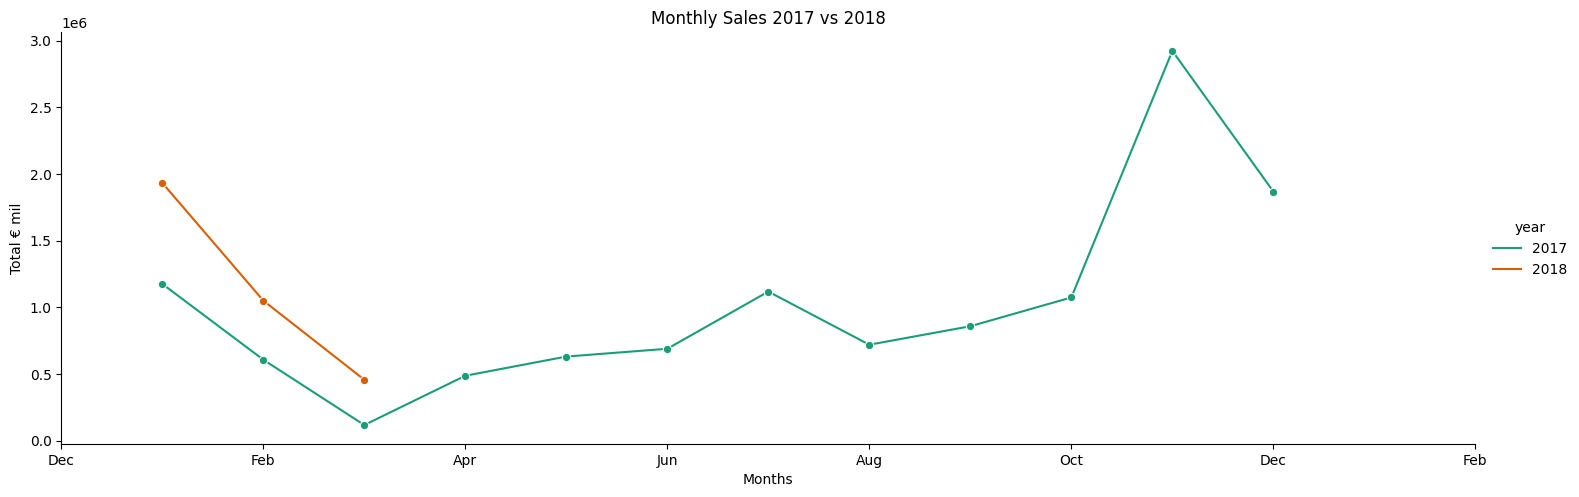

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

o_ol = pd.merge(o_cl, ol_cl, on="order_id", how="inner")

o_ol["date"] = pd.to_datetime(o_ol["date"])
o_ol["month"] = o_ol.date.dt.month
o_ol["year"] = o_ol.date.dt.year

o_ol

monthly_sales = (o_ol
     .groupby(["month", "year"])
     .agg({"total_price": "sum"})
     .reset_index())

monthly_sales
month_names = (["Dec", "Feb", "Apr", "Jun", "Aug","Oct", "Dec", "Feb"])

sns.relplot(data=monthly_sales,
                x="month",
                y="total_price",
                hue="year",
                kind="line", 
                aspect=3,
                palette="Dark2",
                marker="o").set_xticklabels(month_names);

plt.title("Monthly Sales 2017 vs 2018")
plt.xlabel("Months")
plt.ylabel("Total € mil")



In [21]:
monthly_sales.sort_values("total_price")

,month,year,total_price
4,3,2017,117009.39
5,3,2018,456868.47
6,4,2017,486537.69
2,2,2017,607088.37
7,5,2017,630672.23
8,6,2017,689047.41
10,8,2017,719480.19
11,9,2017,858131.84
3,2,2018,1050646.84
12,10,2017,1074082.18


<Figure size 2000x1200 with 0 Axes>

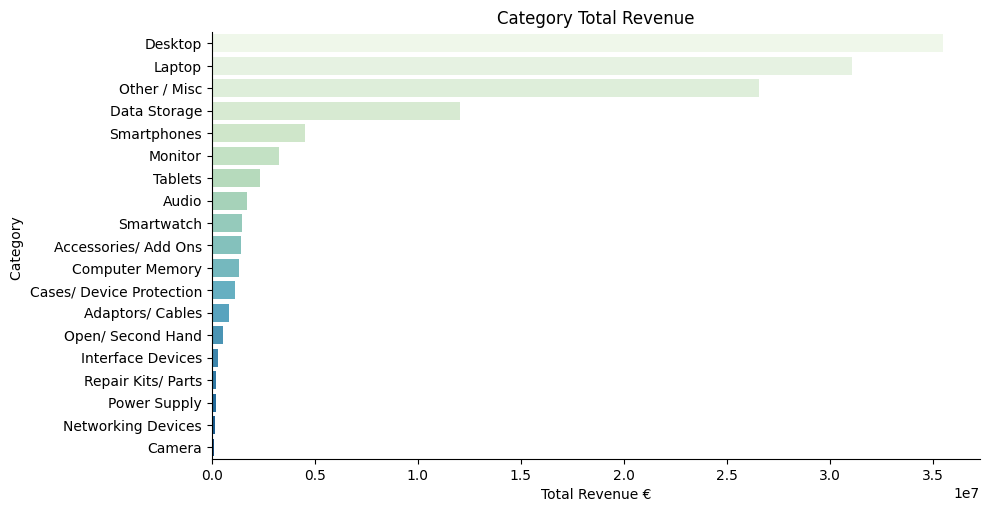

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import savefig

ol_p = pd.merge(p_cl, ol_cl, on="sku", how="inner")

ol_p

category_revenue= (ol_p
     .groupby(["category"])
     .agg({"total_price": "sum"})
     .sort_values(by=["total_price"], ascending=False)
     .reset_index())

plt.figure(figsize=(20,12))
category_total_revenue = sns.catplot(data=category_revenue,
            kind="bar",
            x="total_price", 
            y="category",
            aspect=2,
            palette="GnBu")
plt.title("Category Total Revenue"),
plt.xlabel("Total Revenue €"),
plt.ylabel("Category ")
#plt.savefig("/Users/abigailflynn/Desktop/category_total_revenue.png")

category_total_revenue.savefig("category_total_revenue.png")

Text(-140.93055555555554, 0.5, 'Category ')

<Figure size 2000x1200 with 0 Axes>

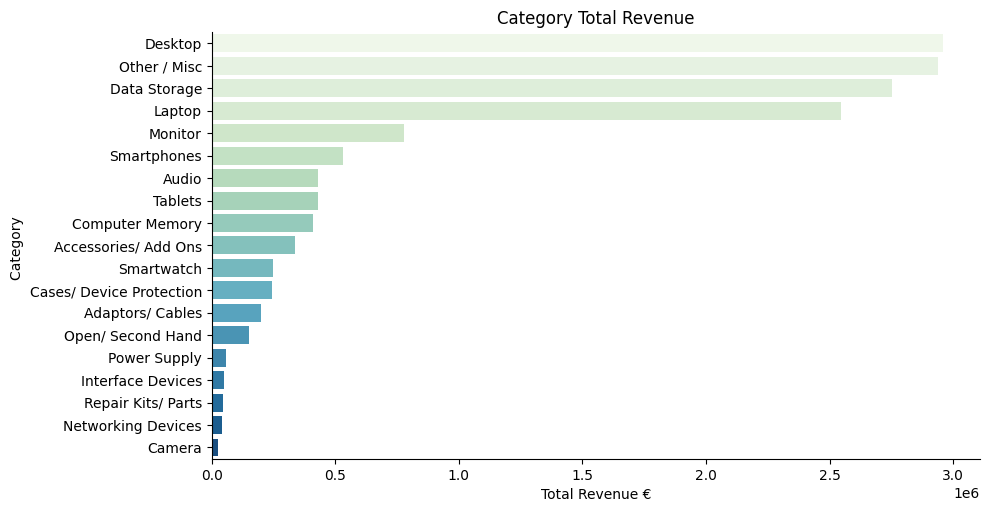

In [23]:
ol_p_o = pd.merge(ol_p, o_cl, on="order_id", how="inner")

category_revenue= (ol_p_o
     .groupby(["category"])
     .agg({"total_price": "sum"})
     .sort_values(by=["total_price"], ascending=False)
     .reset_index())

category_revenue["total_price"].sum()

category_revenue

plt.figure(figsize=(20,12))
category_total_revenue = sns.catplot(data=category_revenue,
             kind="bar",
             x="total_price", 
             y="category",
             aspect=2,
             palette="GnBu")
plt.title("Category Total Revenue"),
plt.xlabel("Total Revenue €"),
plt.ylabel("Category ")

In [24]:
category_revenue

,category,total_price
0,Desktop,2960728.11
1,Other / Misc,2940469.88
2,Data Storage,2750942.93
3,Laptop,2548384.68
4,Monitor,777220.24
5,Smartphones,531449.86
6,Audio,431958.44
7,Tablets,428852.81
8,Computer Memory,411120.77
9,Accessories/ Add Ons,336545.27


In [29]:
ol_p = pd.merge(p_cl, ol_cl, on="sku", how="inner")

ol_p

ol_p["price"].agg(["min", "mean", "max"])
#category_price_range

min        2.99
mean     461.34
max    15339.00
Name: price, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Accessories/ Add Ons'),
  Text(1, 0, 'Other / Misc'),
  Text(2, 0, 'Adaptors/ Cables'),
  Text(3, 0, 'Computer Memory'),
  Text(4, 0, 'Networking Devices'),
  Text(5, 0, 'Cases/ Device Protection'),
  Text(6, 0, 'Data Storage'),
  Text(7, 0, 'Interface Devices'),
  Text(8, 0, 'Laptop'),
  Text(9, 0, 'Camera'),
  Text(10, 0, 'Tablets'),
  Text(11, 0, 'Repair Kits/ Parts'),
  Text(12, 0, 'Audio'),
  Text(13, 0, 'Power Supply'),
  Text(14, 0, 'Open/ Second Hand'),
  Text(15, 0, 'Desktop'),
  Text(16, 0, 'Monitor'),
  Text(17, 0, 'Smartwatch'),
  Text(18, 0, 'Smartphones')])

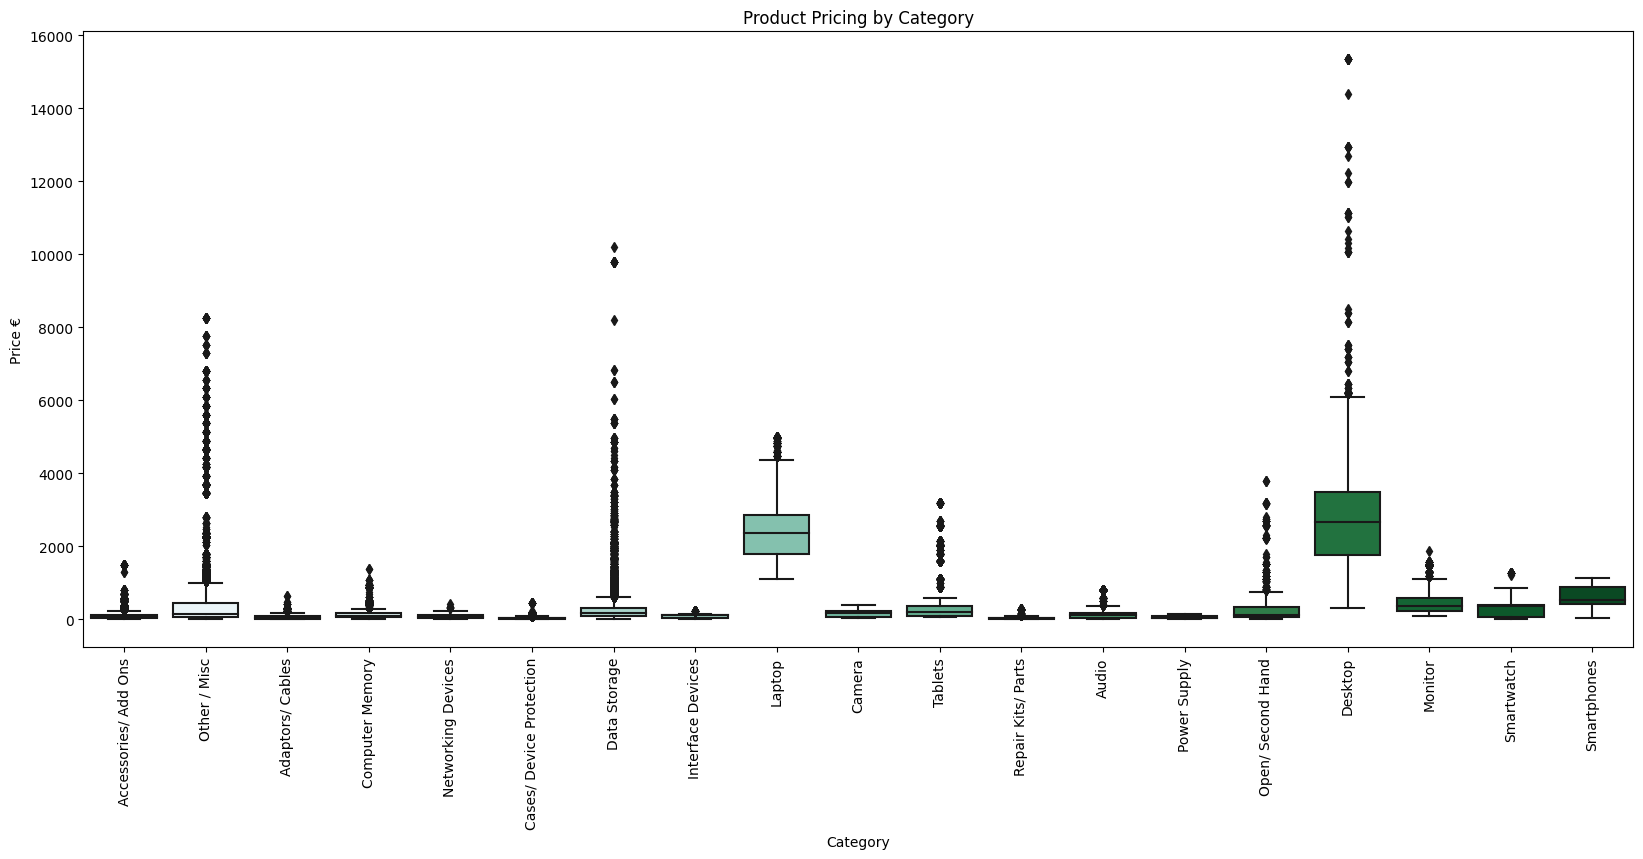

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import savefig

ol_p = pd.merge(p_cl, ol_cl, on="sku", how="inner")

ol_p

plt.figure(figsize=(20,8))
product_pricing_by_cat = sns.boxplot(data=ol_p, 
                                     x="category", 
                                     y="price", 
                                     palette="BuGn")
plt.title("Product Pricing by Category"),
plt.xlabel("Category"),
plt.ylabel("Price €"),
plt.xticks(rotation=90)

#product_pricing_by_cat.savefig("product_pricing_by_cat.png")

In [28]:
ol_p.sort_values("price", ascending=False)

,sku,name,desc,price,type,short,category,order_id,product_quantity,date,unit_price_cl,total_price
273386,APP2660,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz | 128GB | 4TB SSD | Radeon Pro Vega 64",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 23GHz,15339.00,118692158,APP,Desktop,487490,1,2018-01-10 10:15:49,12175.24,12175.24
273391,APP2660,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz | 128GB | 4TB SSD | Radeon Pro Vega 64",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 23GHz,15339.00,118692158,APP,Desktop,501275,1,2018-01-29 17:18:55,14580.00,14580.00
273384,APP2660,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz | 128GB | 4TB SSD | Radeon Pro Vega 64",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 23GHz,15339.00,118692158,APP,Desktop,487164,1,2018-01-09 23:33:16,14580.00,14580.00
273385,APP2660,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz | 128GB | 4TB SSD | Radeon Pro Vega 64",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 23GHz,15339.00,118692158,APP,Desktop,487192,1,2018-01-10 00:05:59,14580.00,14580.00
273387,APP2660,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz | 128GB | 4TB SSD | Radeon Pro Vega 64",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 23GHz,15339.00,118692158,APP,Desktop,488935,4,2018-01-11 21:11:34,14580.00,58320.00
...,...,...,...,...,...,...,...,...,...,...,...,...
60662,IFX0017,iFixit SIM Card Eject Tool for iPhone and iPad,Tool for easy removal of the SIM card for iPhone and iPad.,2.99,12645406,IFX,Repair Kits/ Parts,485136,1,2018-01-08 10:13:48,1.99,1.99
60663,IFX0017,iFixit SIM Card Eject Tool for iPhone and iPad,Tool for easy removal of the SIM card for iPhone and iPad.,2.99,12645406,IFX,Repair Kits/ Parts,488651,1,2018-01-11 14:01:23,1.99,1.99
60664,IFX0017,iFixit SIM Card Eject Tool for iPhone and iPad,Tool for easy removal of the SIM card for iPhone and iPad.,2.99,12645406,IFX,Repair Kits/ Parts,491197,1,2018-01-15 11:48:45,1.99,1.99
60665,IFX0017,iFixit SIM Card Eject Tool for iPhone and iPad,Tool for easy removal of the SIM card for iPhone and iPad.,2.99,12645406,IFX,Repair Kits/ Parts,502503,1,2018-01-31 07:30:36,1.99,1.99
